In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('02balanced.csv')

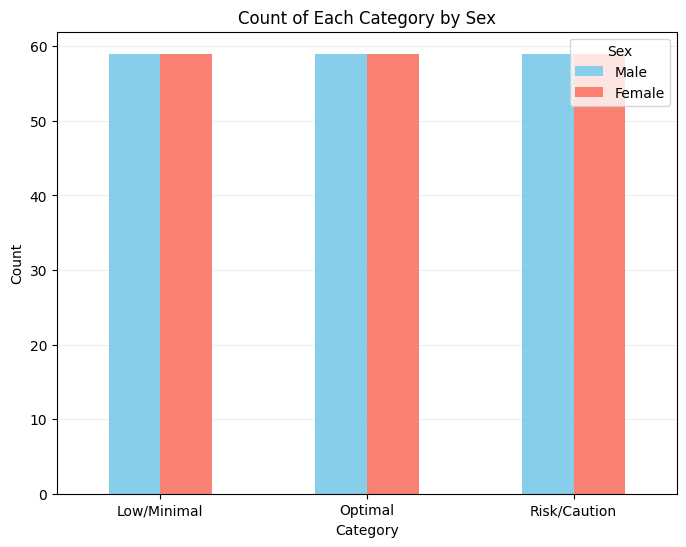

In [10]:
def plot_FATIGvsSEX(df):
    contagem = pd.crosstab(df["FatigInd"], df["Sex_F"])
    # Plot the chart with bars separated by Sex_F
    contagem.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(8, 6))
    plt.title('Count of Each Category by Sex')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.legend(['Male', 'Female'], title='Sex')
    plt.grid(axis='y', alpha=0.2)
    plt.xticks(rotation=0)
    plt.show()

plot_FATIGvsSEX(df)

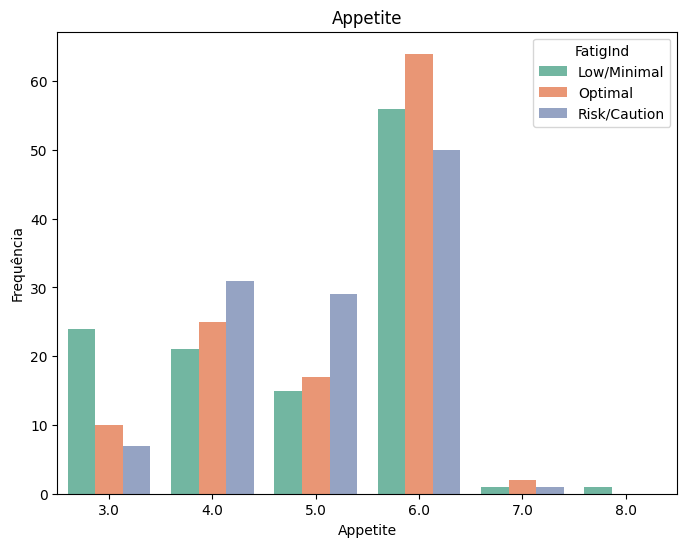

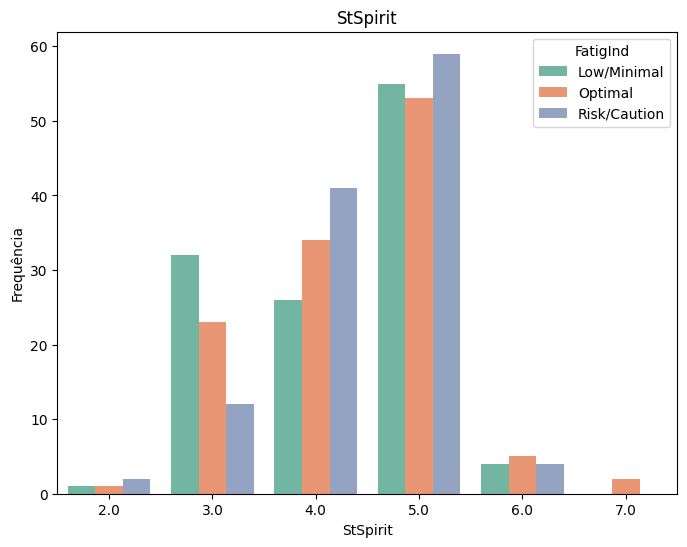

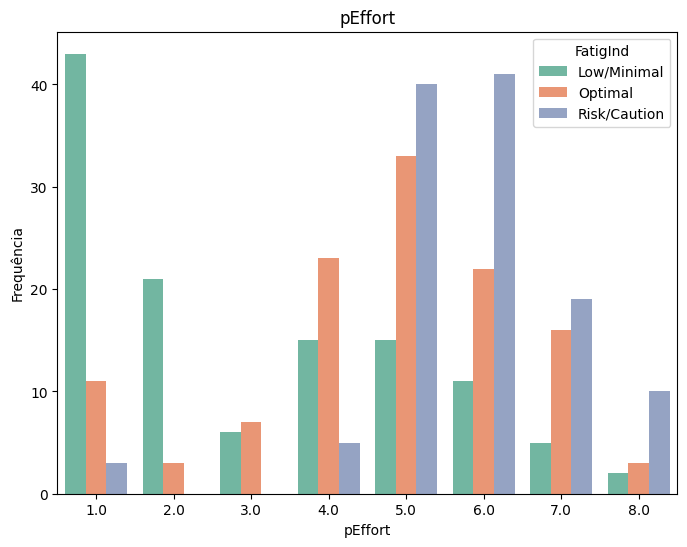

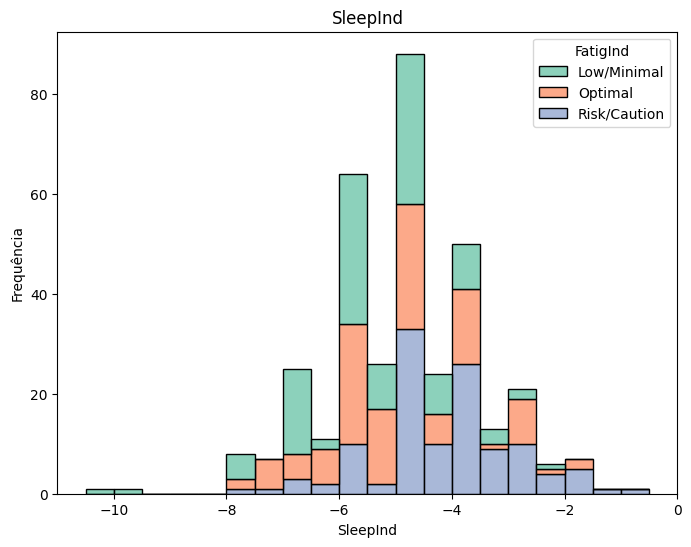

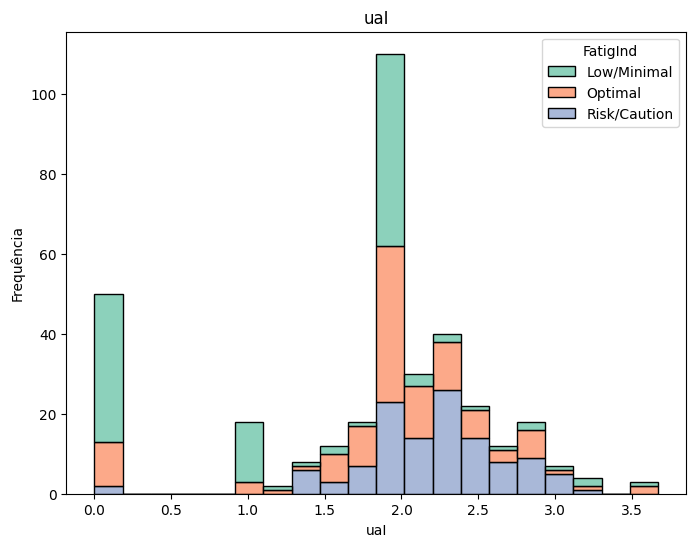

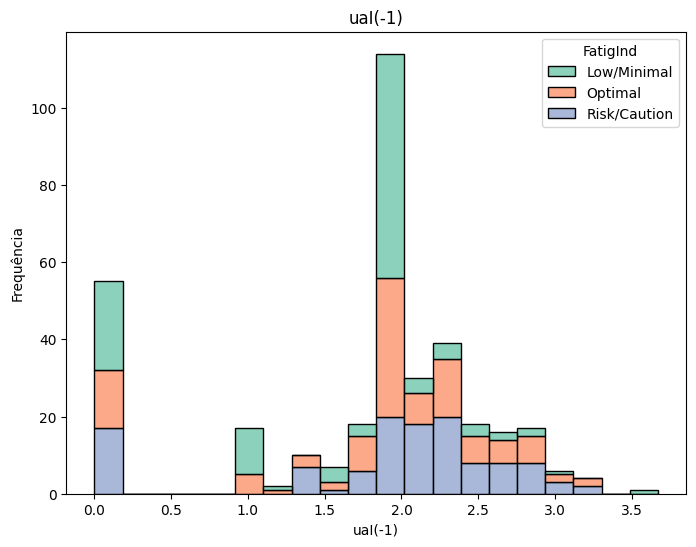

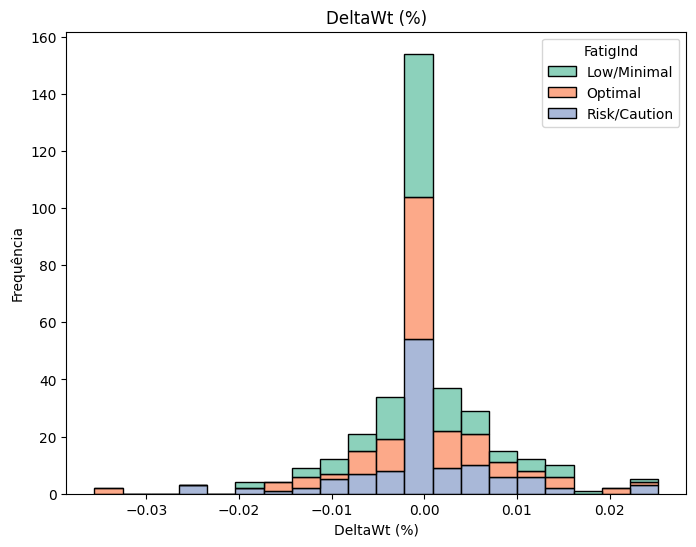

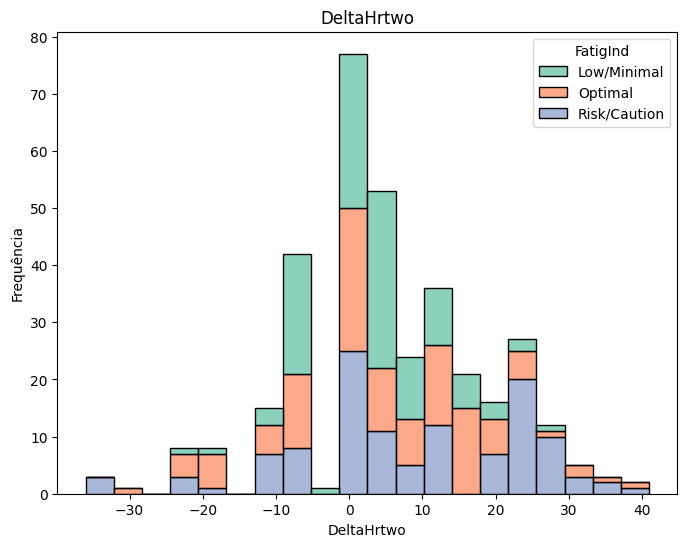

In [11]:
def plot_FATIGvsVARS(dfGB):
    for cc in ['Appetite', 'StSpirit', 'pEffort']:

        # Criando o gráfico de barras com base em 'Appetite' e 'FatigInd'
        plt.figure(figsize=(8,6))
        sns.countplot(data=dfGB, x=cc, hue='FatigInd', palette='Set2')

        # Adicionando título e rótulos
        plt.title(f"{cc}")
        plt.xlabel(f'{cc}')
        plt.ylabel('Frequência')

        # Exibindo o gráfico
        plt.show()

    for cc in ['SleepInd','uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo']:

        # Criando o gráfico de barras com base em 'Appetite' e 'FatigInd'
        plt.figure(figsize=(8,6))
        sns.histplot(data=dfGB, x=cc, hue='FatigInd', palette='Set2', bins=20, kde=False,multiple='stack')

        # Adicionando título e rótulos
        plt.title(f"{cc}")
        plt.xlabel(f'{cc}')
        plt.ylabel('Frequência')

        # Exibindo o gráfico
        plt.show()

plot_FATIGvsVARS(df)

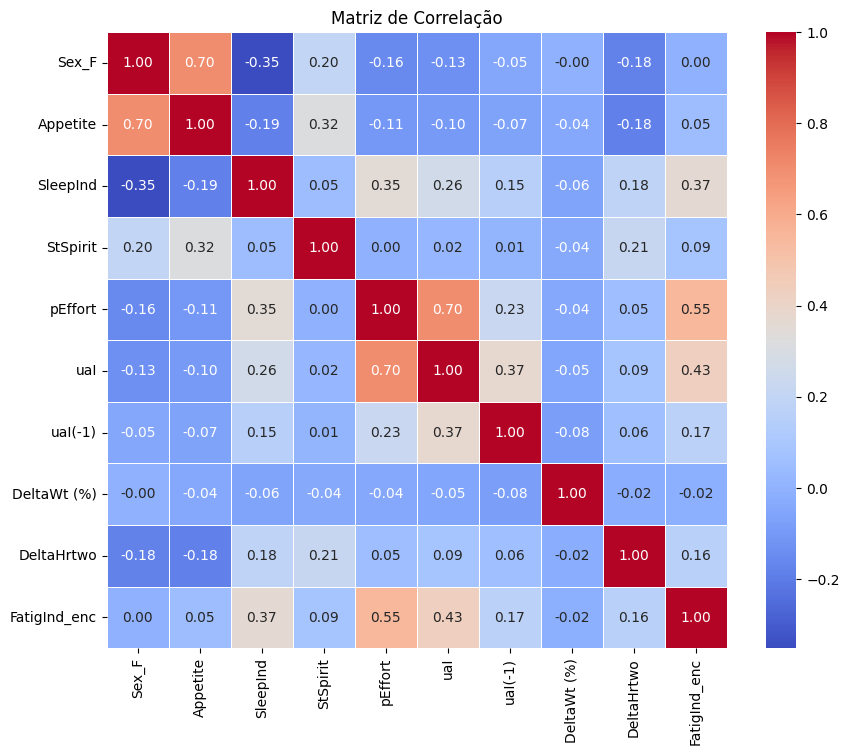

In [12]:
def plot_correlation(df):
       df_corr = df.copy()
       df_corr = df_corr[['Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
              'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd']]
              
       # Codificar a variável target (se ela for categórica)
       # Suponha que 'target' seja a variável categórica
       encoder = LabelEncoder()
       df_corr['FatigInd_enc'] = encoder.fit_transform(df_corr['FatigInd'])

       # Selecione apenas as variáveis numéricas para calcular a correlação
       df_numeric = df_corr.select_dtypes(include=['float64', 'int64'])

       # Adicione a variável target codificada para análise de correlação
       df_numeric['FatigInd_enc'] = df_corr['FatigInd_enc']

       # Calcular a matriz de correlação
       corr_matrix = df_numeric.corr()

       # Plotando o heatmap
       plt.figure(figsize=(10, 8))
       sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
       plt.title("Matriz de Correlação")
       plt.show()

plot_correlation(df)